
<div style="color: White; display: fill;
            border-radius: 5px;
            background-color: #362FD9;
            font-size: 100%;
            font-family: Verdana">

<p style="padding: 7px; color: Black;">
      <ul>  📌 <b>Customer ID</b> - Unique identifier for each customer.<br>
        📌 <b>Age</b> - Age of the customer.<br>
        📌 <b>Gender</b> - Gender of the customer (Male/Female).<br>
        📌 <b>Item Purchased</b> - The item purchased by the customer.<br>
        📌 <b>Category</b> - Category of the item purchased.<br>
        📌 <b>Purchase Amount (USD)</b> - The amount of the purchase in USD.<br>
        📌 <b>Location</b> - Location where the purchase was made.<br>
        📌 <b>Size</b> - Size of the purchased item.<br>
        📌 <b>Color</b> - Color of the purchased item.<br>
        📌 <b>Season</b> - Season during which the purchase was made.<br>
        📌 <b>Review Rating</b> - Rating given by the customer for the purchased item.<br>
        📌 <b>Subscription Status</b> - Indicates if the customer has a subscription (Yes/No).<br>
        📌 <b>Shipping Type</b> - Type of shipping chosen by the customer.<br>
        📌 <b>Discount Applied</b> - Indicates if a discount was applied to the purchase (Yes/No).<br>
        📌 <b>Promo Code Used</b> - Indicates if a promo code was used for the purchase (Yes/No).<br>
        📌 <b>Previous Purchases</b> - Number of previous purchases made by the customer.<br>
        📌 <b>Payment Method</b> - Customer's most preferred payment method.<br>
        📌 <b>Frequency of Purchases</b> - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly).<br><br>
    <p style = "padding: 3px; color: Black;">


In [12]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [36]:
df = pd.read_csv("shopping_trends_updated.csv")
#df.sample(5)
print(df)
#print(str())
#print(df.to_string()) 

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

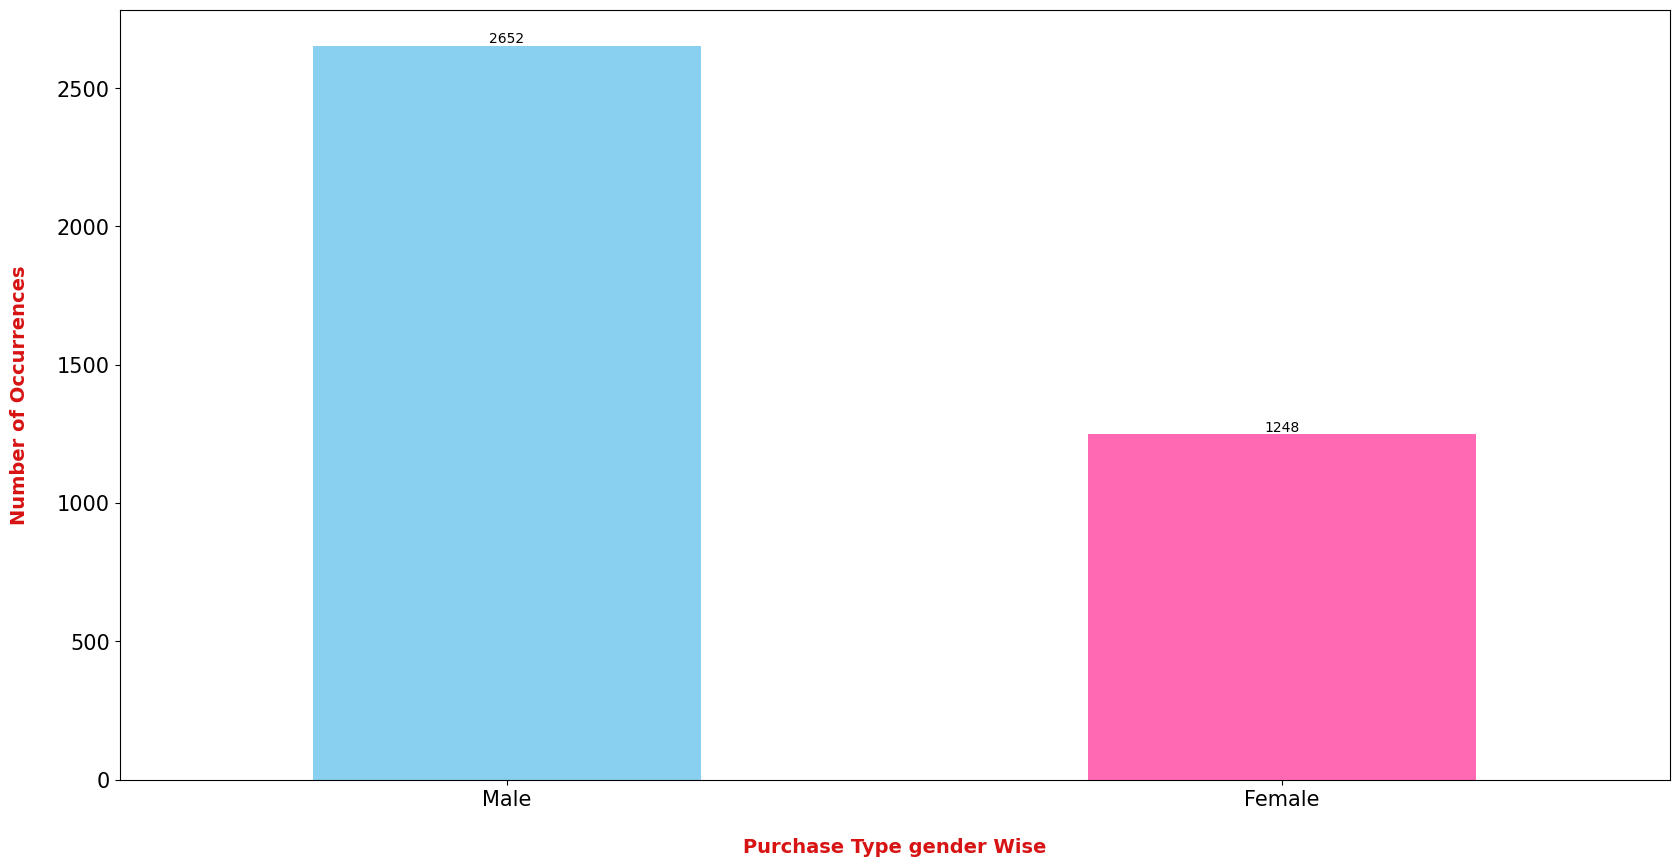

In [37]:
# 1. Purchase Gender Wise: Analysis of purchases categorized by gender.

plt.figure(figsize = (20, 10))
ax = df["Gender"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Male', 'Female'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Purchase Type gender Wise', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

<div style="padding:10px;
            color:#E55604;
            margin:10px;
            font-size:130%;
            display:fill;
            border-radius:5px;
            border-style: solid;
            border-color: #FF9B50;
            background-color:#000000;
            overflow:hidden;
            font-weight:400"><b>Importing Libraries</b>
</div>

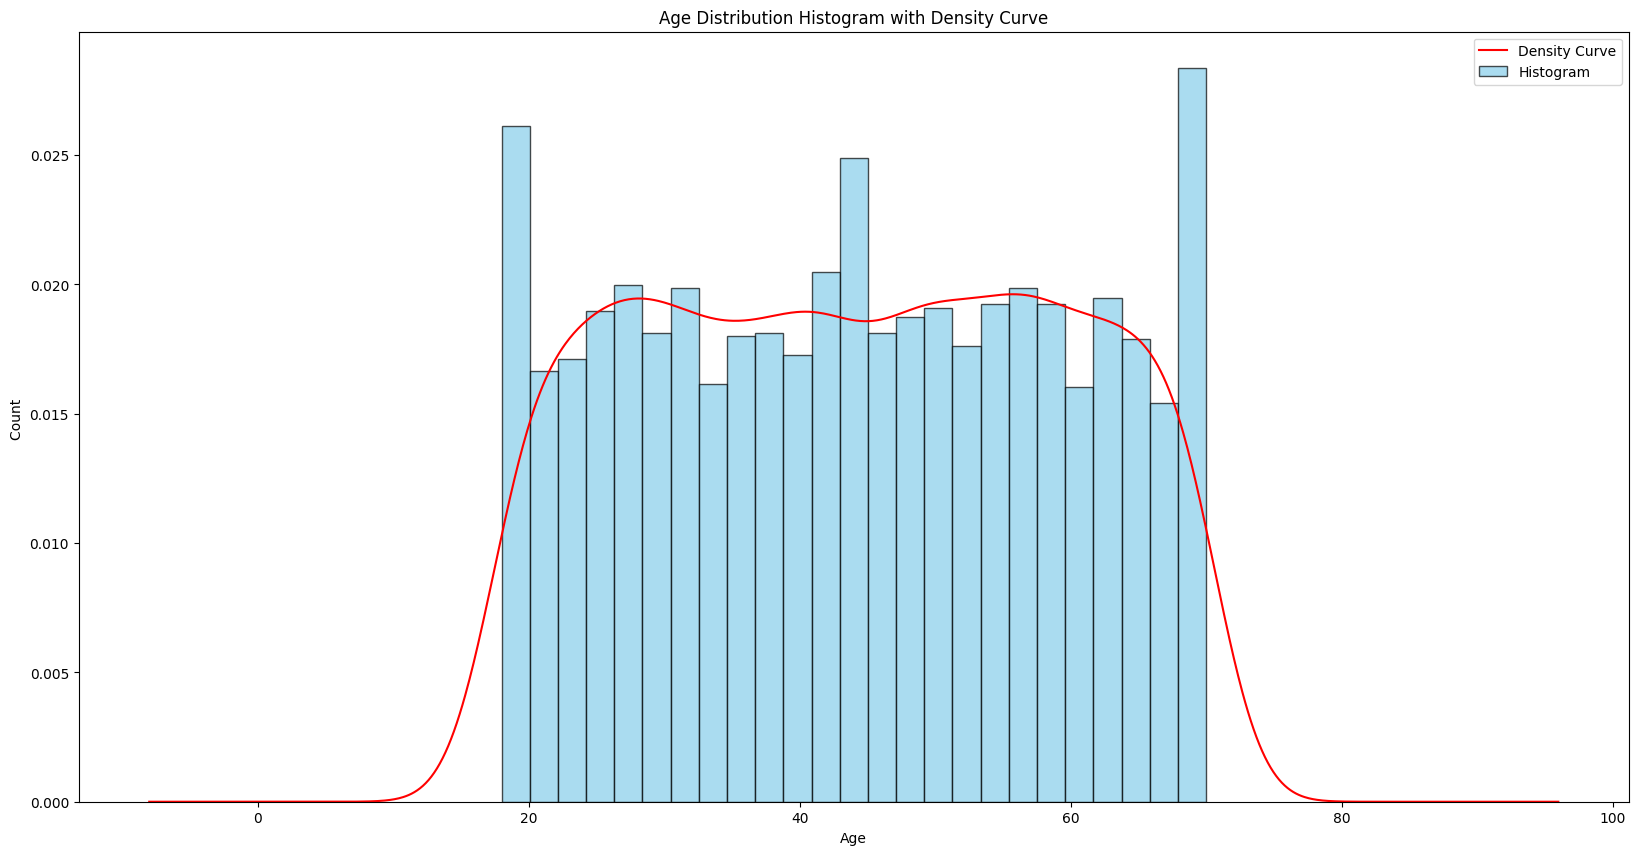

In [38]:
# 2. Age Wise Distribution: Distribution of purchases across different age groups.

fig, ax = plt.subplots(figsize = (20, 10))

ax.hist(df['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
df['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count ')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

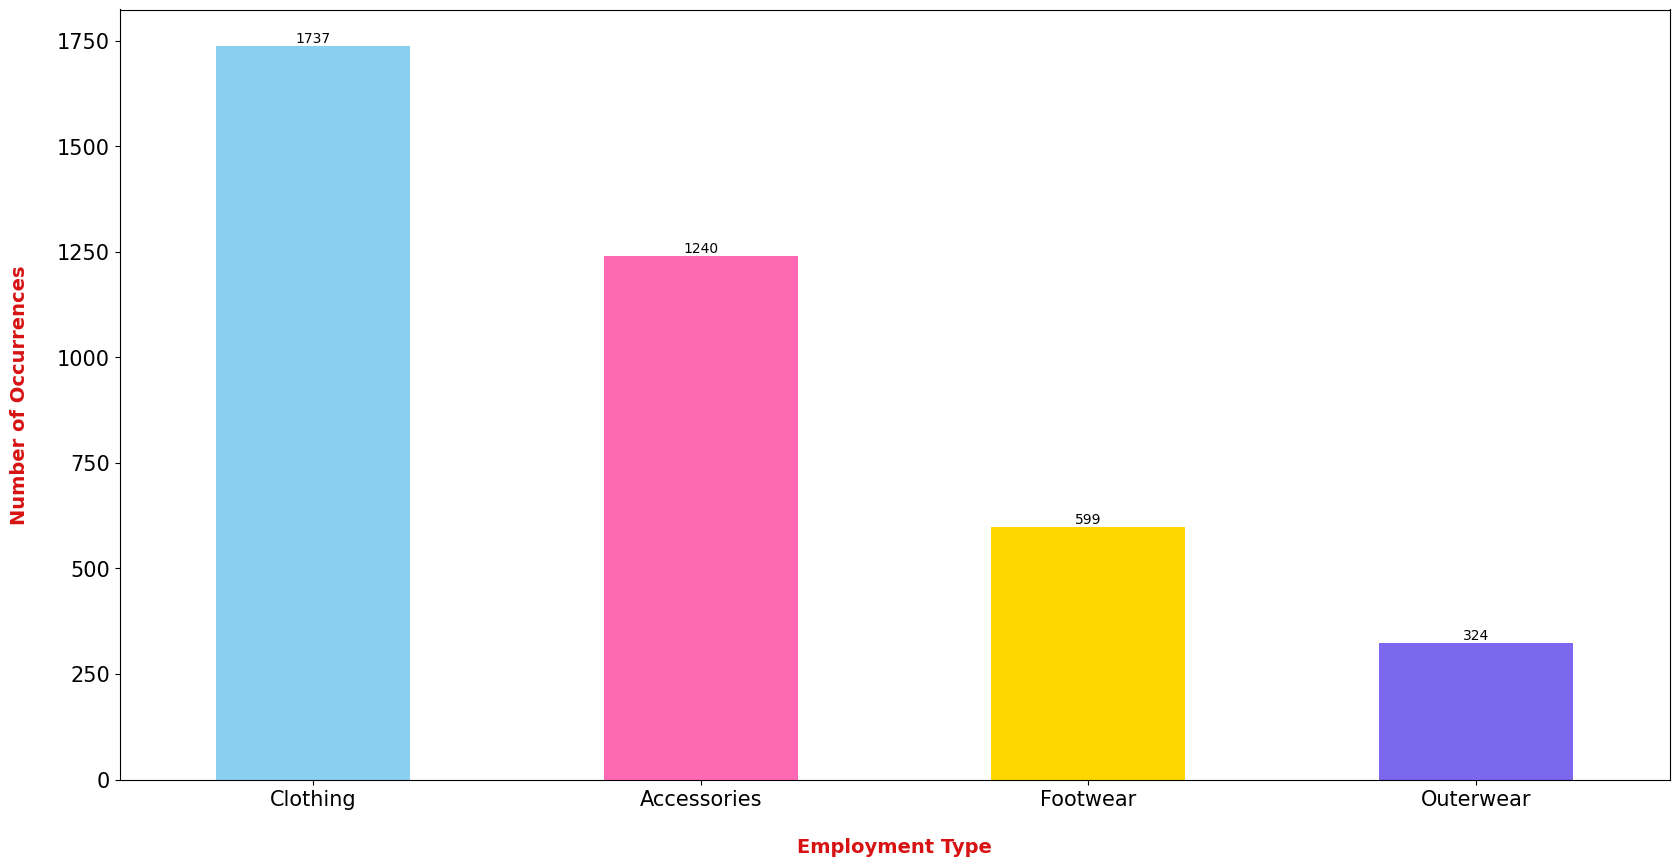

In [39]:
# 3. Item Categories Wise Count: Count of purchases in each item category.

plt.figure(figsize = (20, 10))
ax = df["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

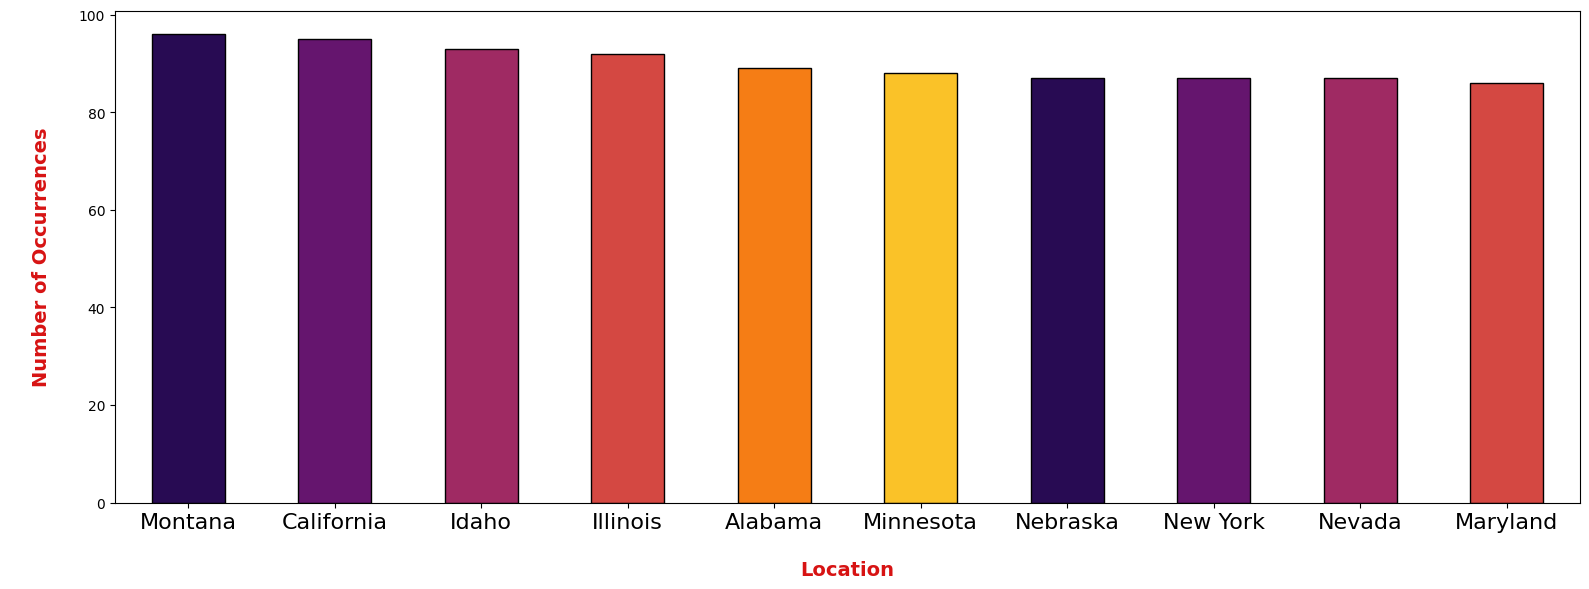

In [ ]:
# 4. Location Wise Count: Count of purchases made from different locations.

plt.figure(figsize = (16, 10))
df["Location"].value_counts()[:10].sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Location', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

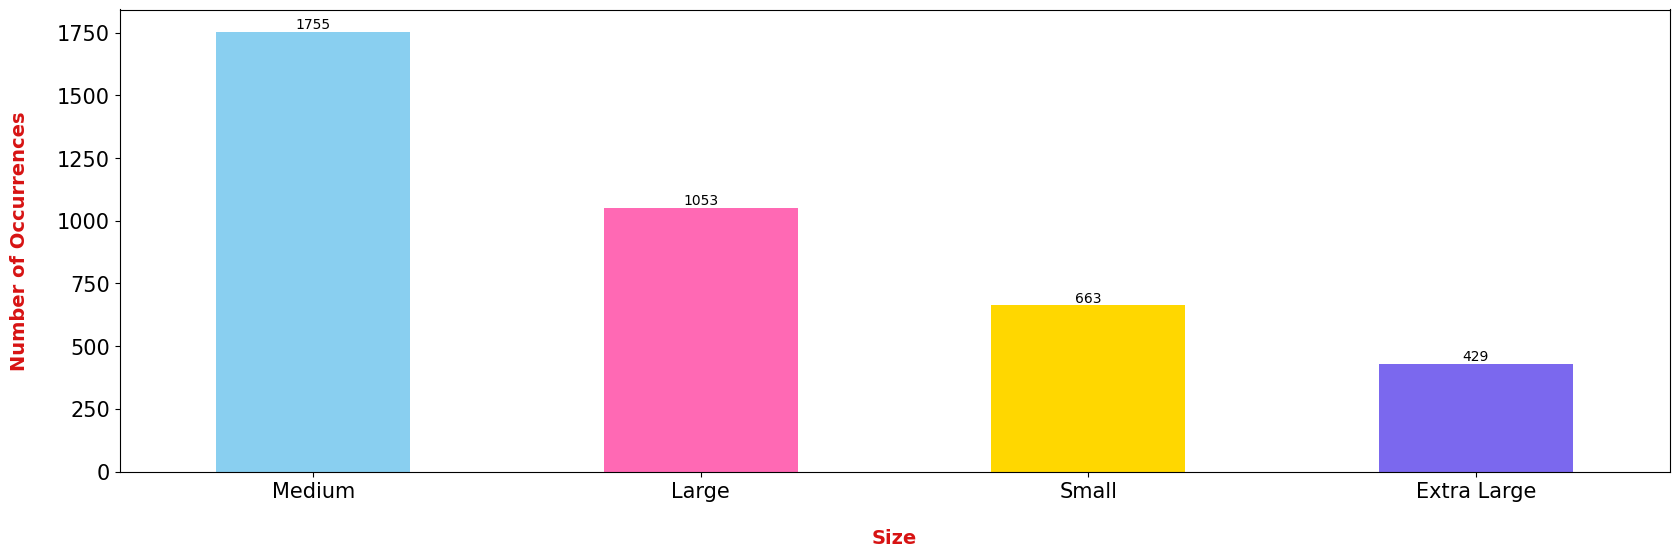

In [ ]:
# 5. Size Wise Item Count: Count of items purchased in each size category.

plt.figure(figsize = (20, 6))
ax = df["Size"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Medium', 'Large', 'Small', 'Extra Large'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Size', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

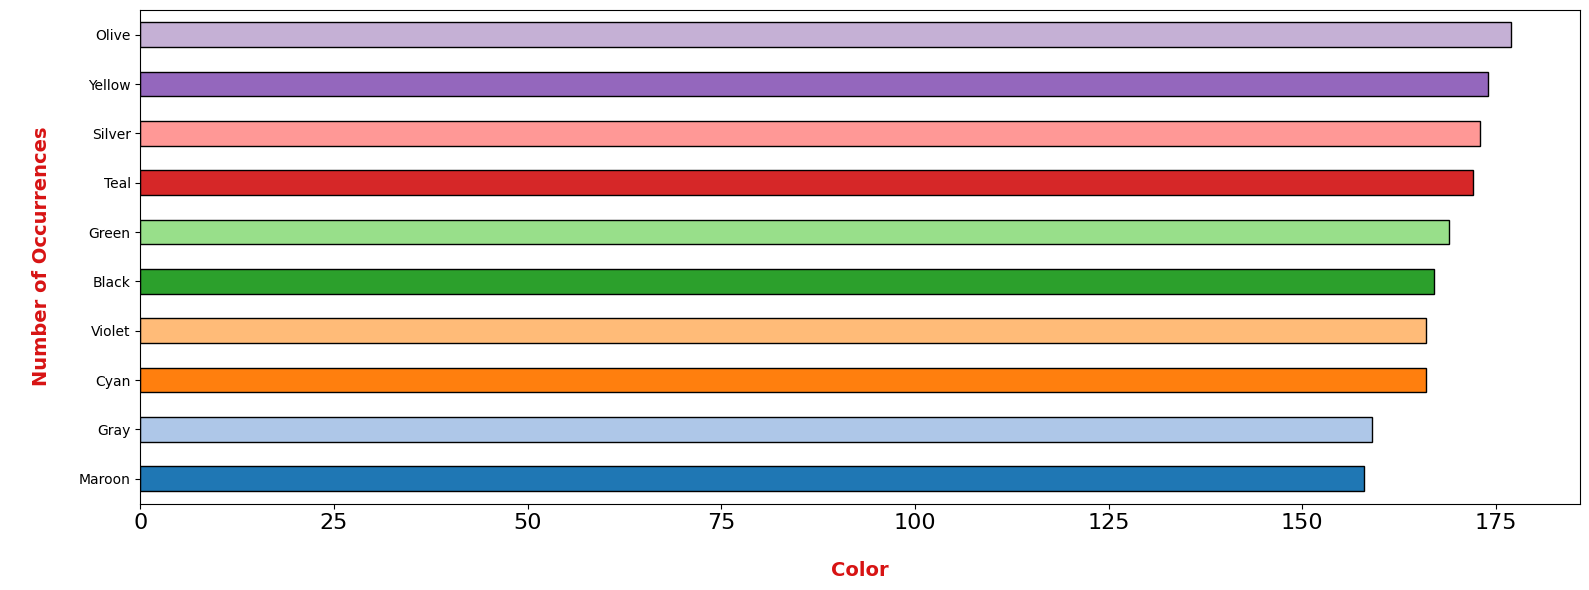

In [ ]:
# 6. Color of Item: Analysis of the distribution of item colors.

plt.figure(figsize = (16, 6))
df["Color"].value_counts()[:10].sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.xlabel('Color', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

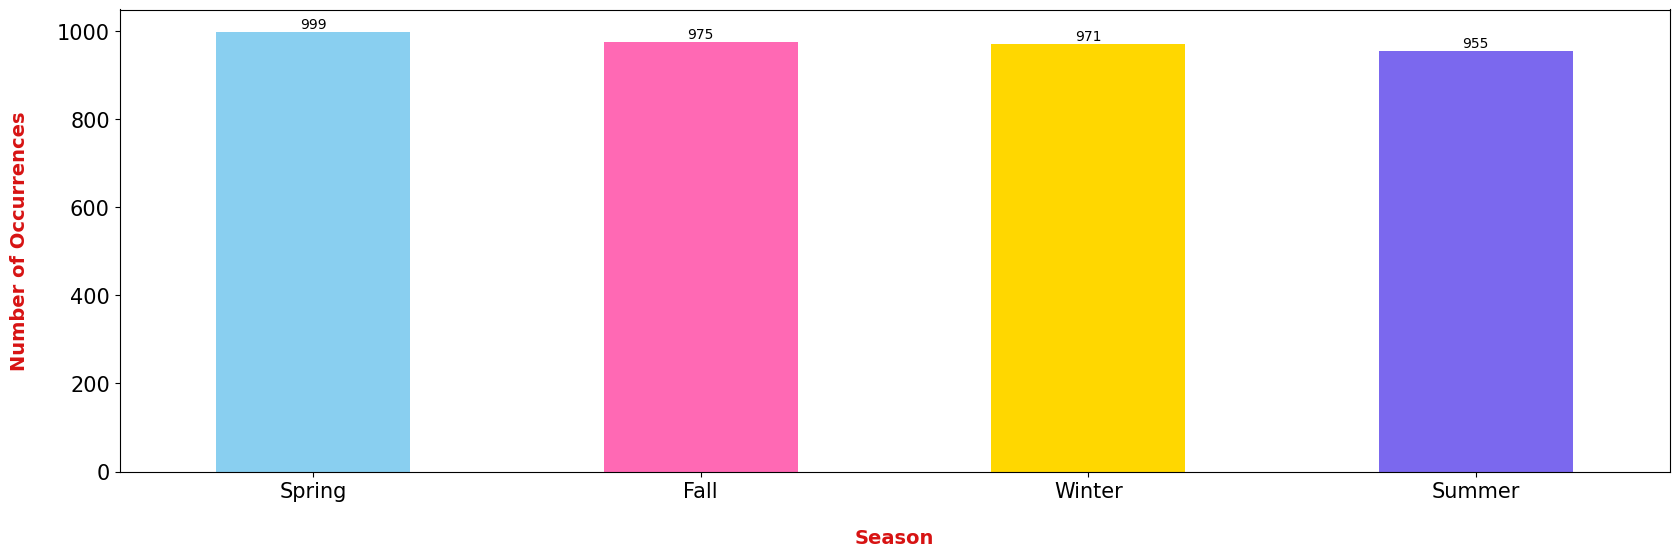

In [ ]:
# 7. Season Wise Count Customers: Number of customers purchasing in each season.

plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Spring', 'Fall', 'Winter', 'Summer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Season', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

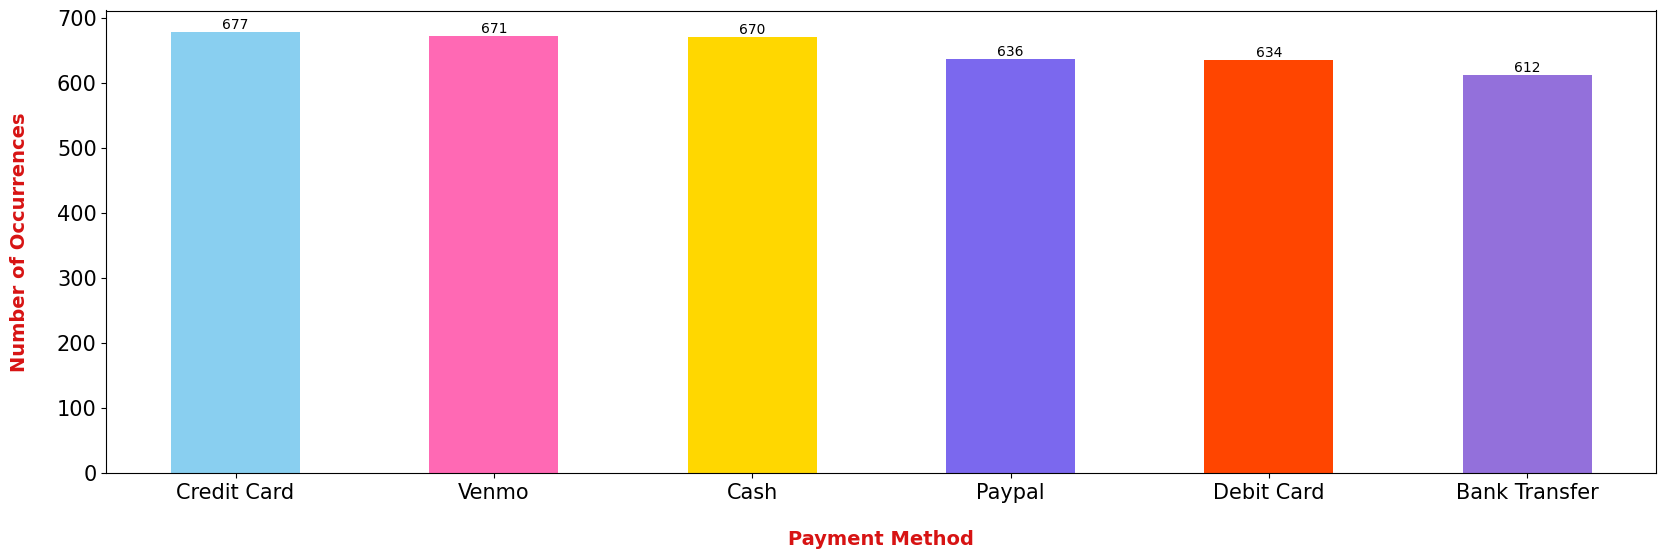

In [ ]:
# 8. Payment Method: Examination of the most commonly used payment methods.

plt.figure(figsize = (20, 6))
ax = df["Payment Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

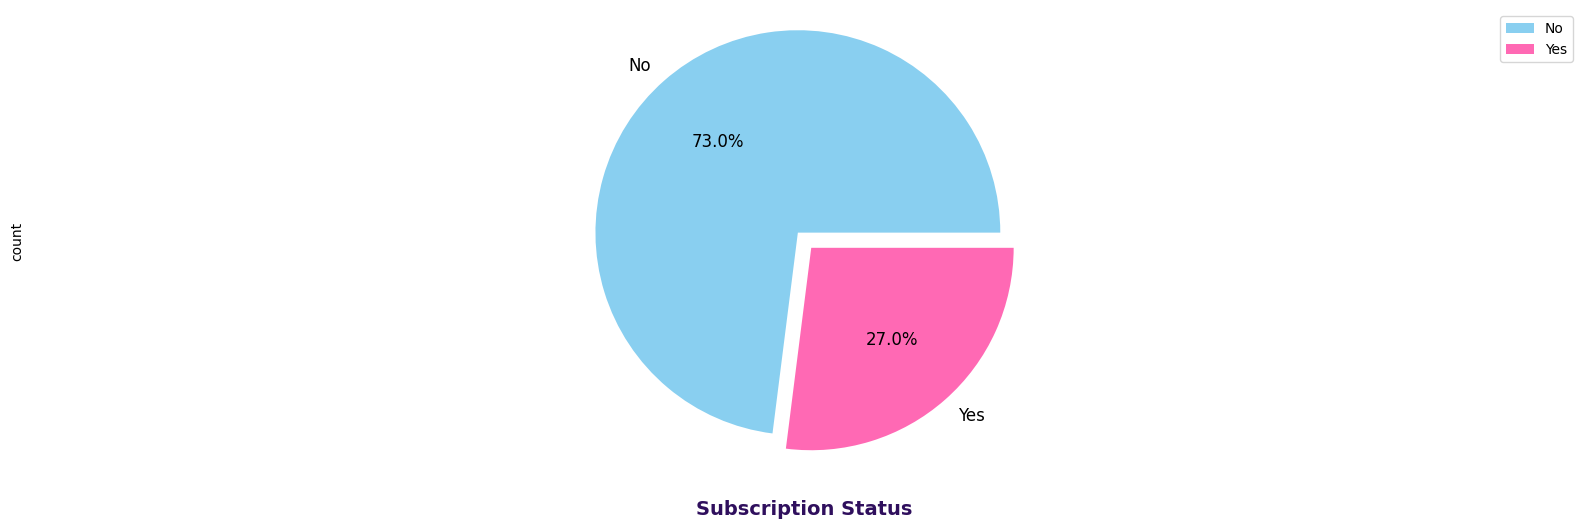

In [ ]:
# 9. Subscription Wise: Breakdown of purchases by subscribed and non-subscribed customers.

plt.figure(figsize = (20, 6))

counts = df["Subscription Status"].value_counts()
explode = (0, 0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.xlabel('Subscription Status', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

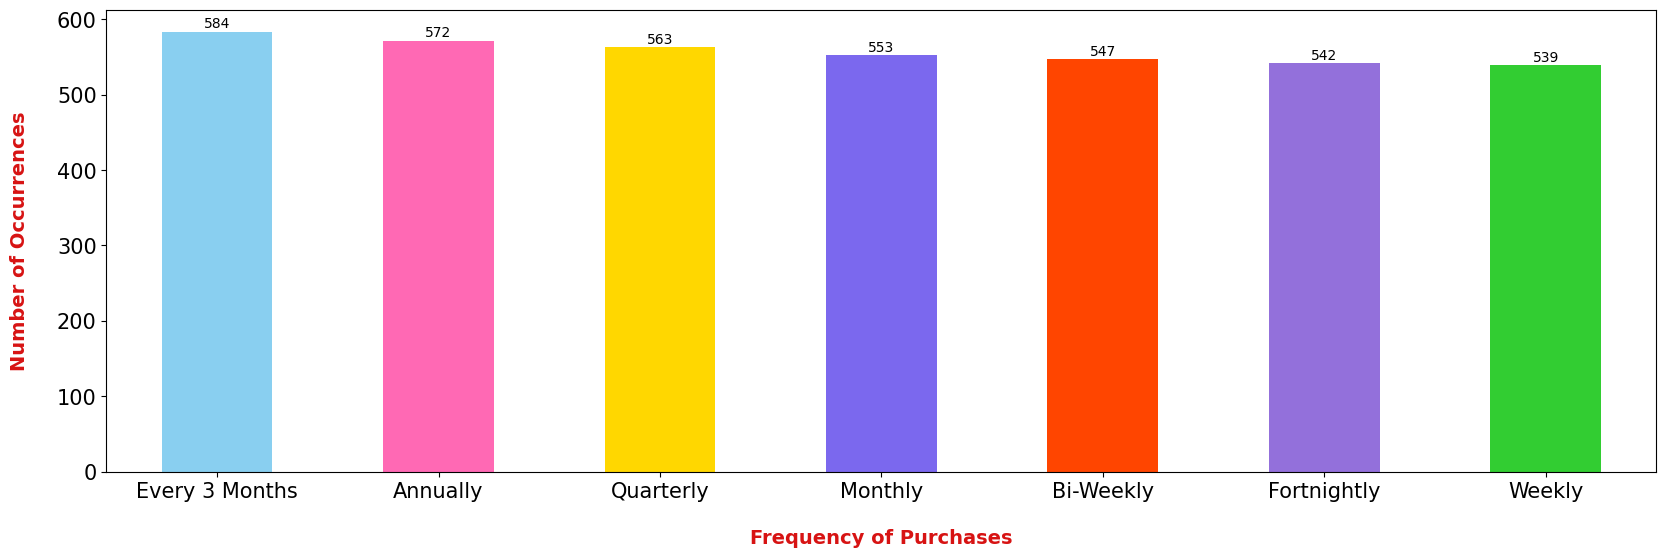

In [ ]:
# 10. Frequency of Purchase: Analysis of how often customers make purchases.

plt.figure(figsize = (20, 6))
ax = df["Frequency of Purchases"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly', 'Weekly'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Frequency of Purchases', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [ ]:
# 11.most common item purchase

most_common_item = df['Item Purchased'].mode()[0]
print("Most Common Item Purchased:", most_common_item)

Most Common Item Purchased: Blouse


In [ ]:
# 12. Total Purchase Amount for Each Category: Calculation of the total purchase amount for each item category.

total_purchase_by_category = df.groupby('Category')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Category:")
print(total_purchase_by_category)

Total Purchase Amount by Category:
Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


In [ ]:
#13.Review avrege Rating Gender Wise: Assessment of review ratings categorized by gender.

average_rating_male = df[df['Gender'] == 'Male']['Review Rating'].mean()
average_rating_female = df[df['Gender'] == 'Female']['Review Rating'].mean()
print("Average Review Rating for Male Customers:", average_rating_male)
print("Average Review Rating for Female Customers:", average_rating_female)

Average Review Rating for Male Customers: 3.7539592760180995
Average Review Rating for Female Customers: 3.741426282051282


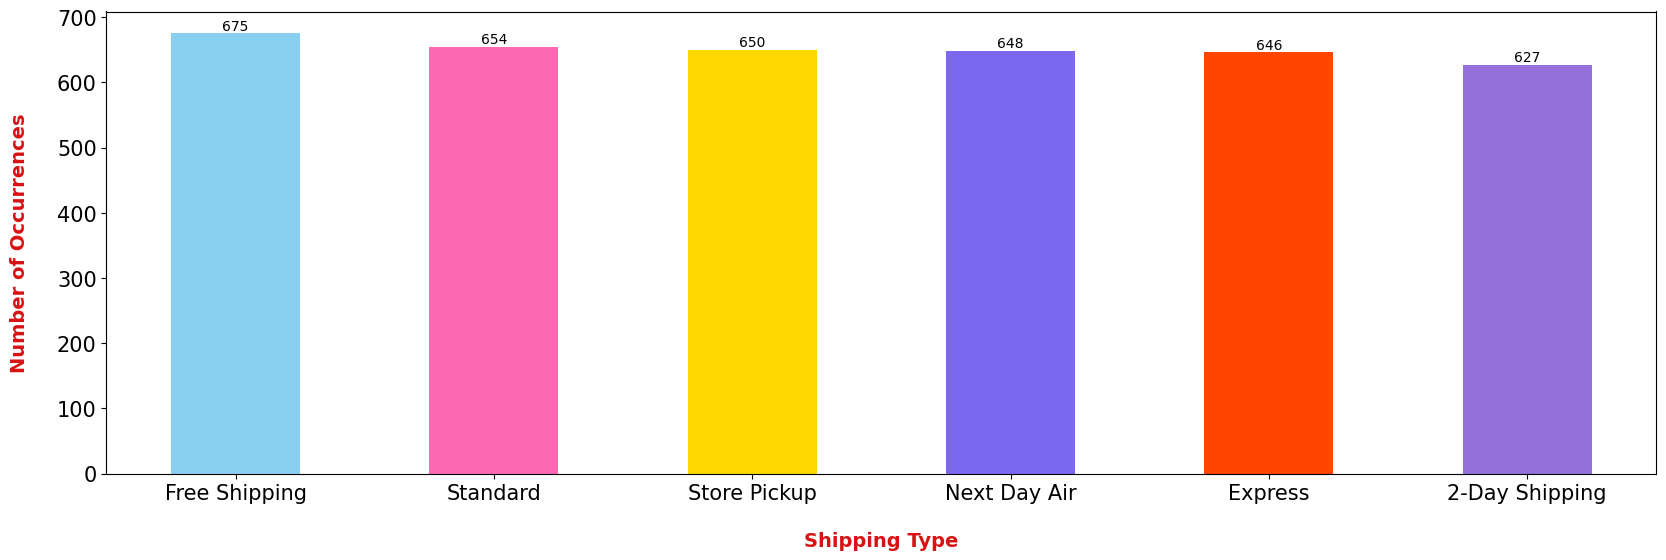

In [ ]:
# 14. Shipping Type: Determination of preferred shipping methods among customers.


plt.figure(figsize = (20, 6))
ax = df["Shipping Type"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Free Shipping', 'Standard', 'Store Pickup', 'Next Day Air', 'Express', '2-Day Shipping'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Shipping Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

In [ ]:
# 15. Promo Code Used by Customer: Analysis of promo code usage by customers.

promo_code_count = df[df['Promo Code Used'] == 'Yes']['Customer ID'].count()
print("Number of Customers who used Promo Code:", promo_code_count)

Number of Customers who used Promo Code: 1677


In [ ]:
# 16. Average Age: Calculation of the average age of customers.

average_age = df['Age'].mean()
print("Average Age:", average_age)

Average Age: 44.06846153846154


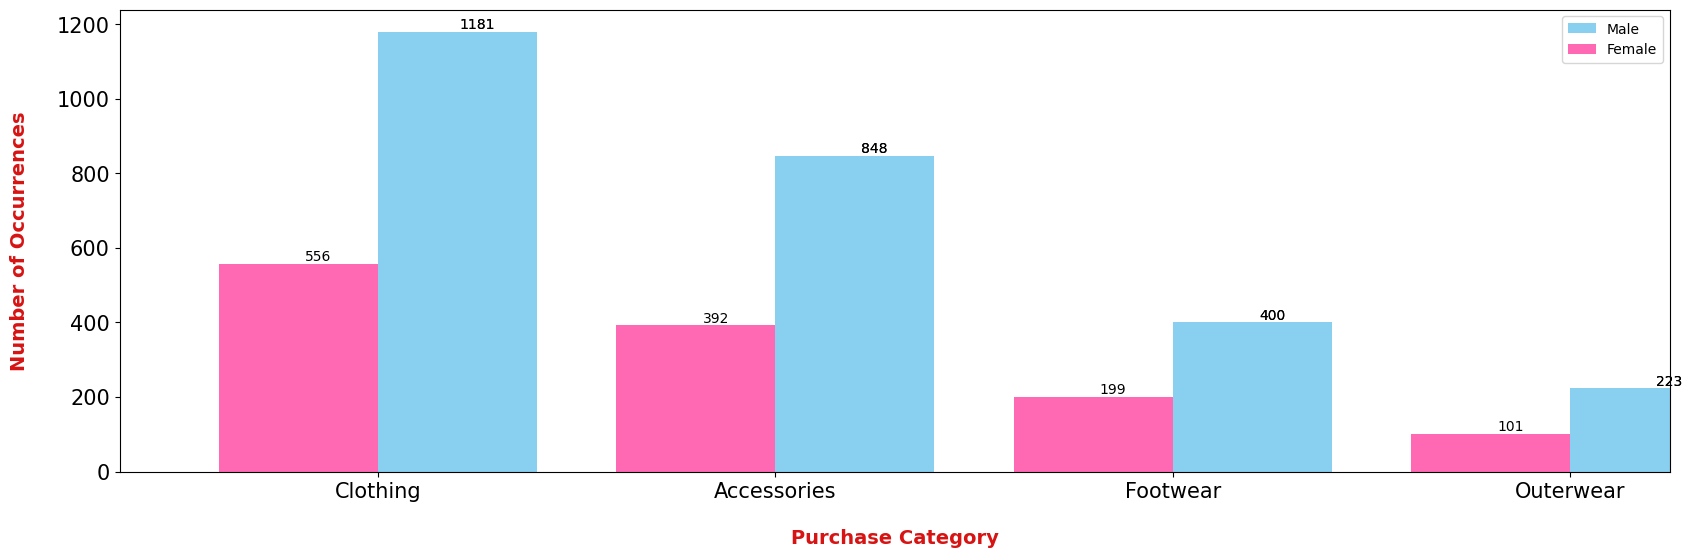

In [ ]:

# 17. Male and Female Categories Wise Clothes and Accessories: Differentiation of purchases of clothes and accessories based on gender.


# Separate purchases by gender
male_df = df[df["Gender"] == "Male"]
female_df = df[df["Gender"] == "Female"]

# Plotting
plt.figure(figsize=(20, 6))


# Plotting male purchases
ax1 = male_df["Category"].value_counts().plot(kind='bar', color = colors[0], position=0, width=0.4, label='Male')
for p in ax1.patches:
    ax1.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax1.tick_params(axis = 'both', labelsize = 15)

# Plotting female purchases
ax2 = female_df["Category"].value_counts().plot(kind='bar', color=colors[1], position=1, width=0.4, label='Female')
for p in ax2.patches:
    ax2.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax2.tick_params(axis = 'both', labelsize = 15)

# Adding labels and styling

plt.xlabel('Purchase Category', fontsize=14, weight='bold', color='#D71313', labelpad=20)
plt.ylabel('Number of Occurrences', fontsize=14, weight='bold', color='#D71313', labelpad=20)
plt.xticks(rotation=0)
plt.legend()

plt.show()




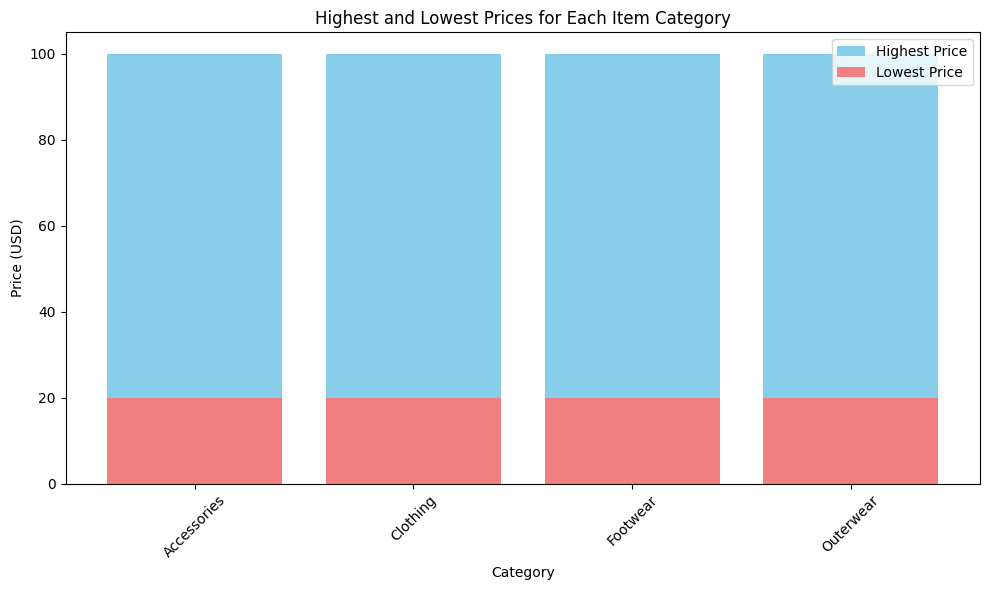

In [ ]:
# 18. Highest and Lowest Price of Item

import pandas as pd
import matplotlib.pyplot as plt


# Group by category and calculate the maximum and minimum purchase amounts
category_price_stats = df.groupby('Category')['Purchase Amount (USD)'].agg(['max', 'min'])

# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Plot highest prices
plt.bar(category_price_stats.index, category_price_stats['max'], color='skyblue', label='Highest Price')

# Plot lowest prices
plt.bar(category_price_stats.index, category_price_stats['min'], color='lightcoral', label='Lowest Price')

plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.title('Highest and Lowest Prices for Each Item Category')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64


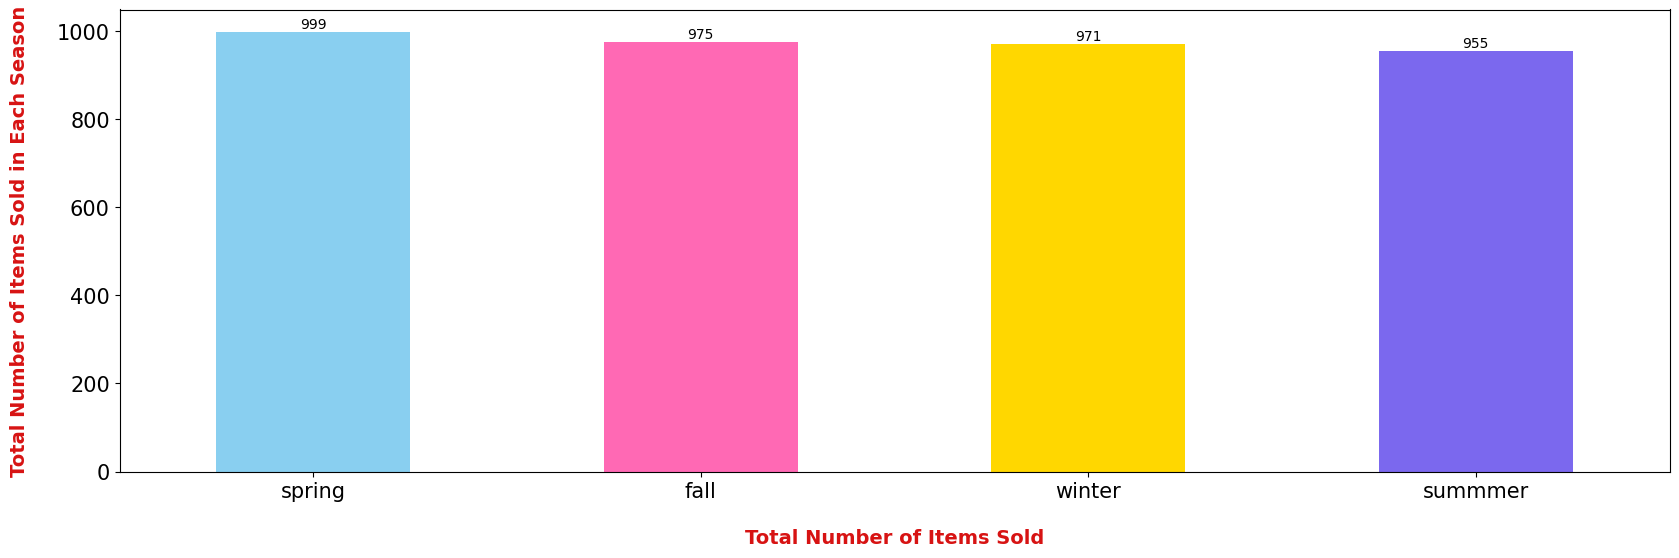

In [16]:
# 19. In Season Wise Highest and Lowest Selling of Item: Determination of the items with the highest and lowest sales during each season.
df = pd.read_csv("shopping_trends_updated.csv")
print(df["Item Purchased"].value_counts())
# Group by season and count the number of unique items

plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('spring','fall','winter','summmer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Total Number of Items Sold', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Total Number of Items Sold in Each Season', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64


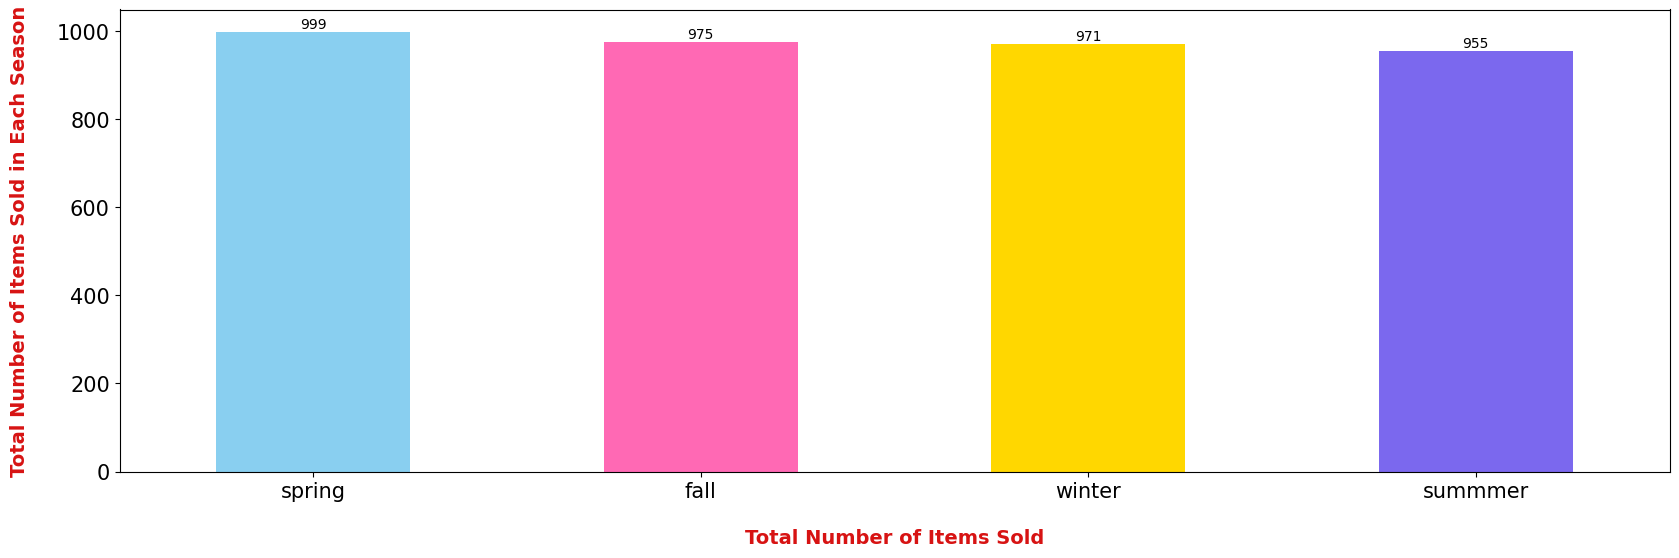

In [ ]:
# 20. Total Item of Every Season: Count of the total number of items sold in each season

print(df["Season"].value_counts())
# Group by season and count the number of unique items

plt.figure(figsize = (20, 6))
ax = df["Season"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('spring','fall','winter','summmer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Total Number of Items Sold', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Total Number of Items Sold in Each Season', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

